# 13장. 성능 지표 평가

## Prophet 성능 지표 데이터프레임 생성(Creating the Prophet performance metrics DataFrame)

#이 코드에는 1시간 30분 런타임이 소요되는 코드 블록이 있으니 반드시 코랩 런타임 유형을 T4 GPT로 설정하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/b0fxl3pt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/y5v1_rlo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54414', 'data', 'file=/tmp/tmp2g1kuk5p/b0fxl3pt.json', 'init=/tmp/tmp2g1kuk5p/y5v1_rlo.json', 'output', 'file=/tmp/tmp2g1kuk5p/prophet_model1rbtonsk/prophet_model-20250224135219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


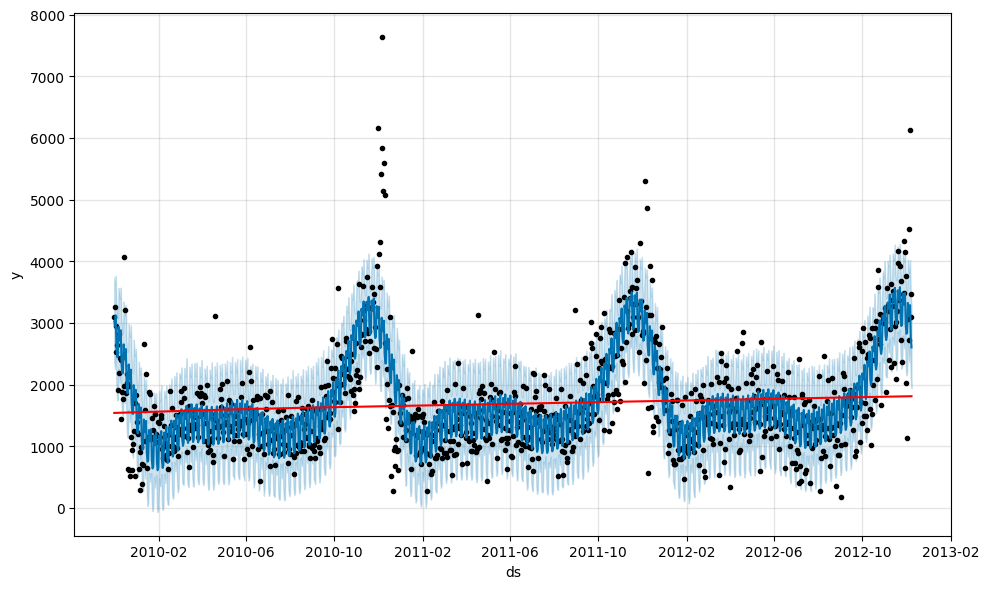

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/online_retail.csv')
df.columns = ['ds', 'y']

model = Prophet(yearly_seasonality=4)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [ ]:
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days',
                         parallel='processes')

INFO:prophet:Making 10 forecasts with cutoffs between 2011-12-14 00:00:00 and 2012-09-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78f451f15f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/9v9u8wwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/x7dbp2cg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/3lyxo2_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/ewdtxmdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59070', 'data', 'file=/tmp/tmp2g1kuk5p/9v9u8wwh.json', 'init=/tmp/tmp2g1kuk5p/3lyxo2_o.json', 'output', 'file=/tmp/tmp2g1kuk5p/prophet_modelf9cep6c1/prophet_model-20250224135224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,221665.139519,470.813275,379.417946,0.300611,0.232032,0.258407,0.855556
1,10 days,218207.460762,467.126814,375.159566,0.297620,0.222065,0.255952,0.866667
2,11 days,202994.658629,450.549285,368.446889,0.287860,0.201320,0.251089,0.888889
3,12 days,179272.200365,423.405480,350.791189,0.273825,0.207287,0.240962,0.922222
4,13 days,173224.229917,416.202150,344.674310,0.261011,0.189869,0.234347,0.933333


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


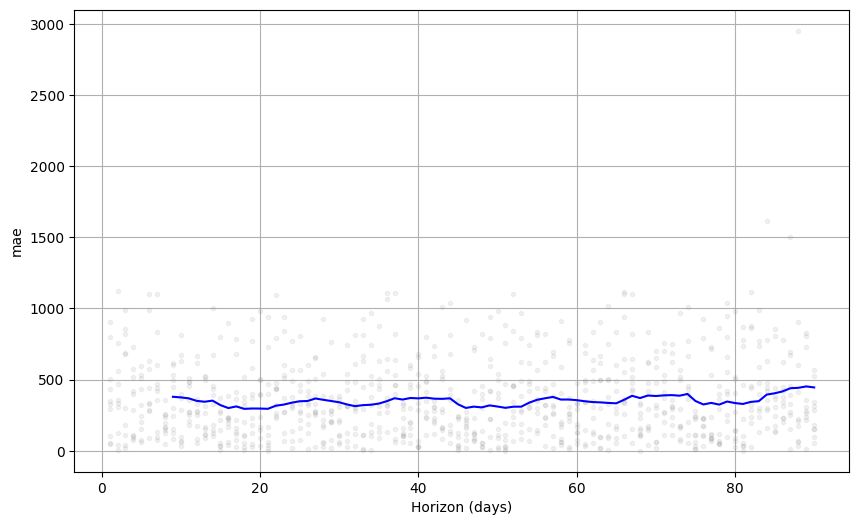

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be remov

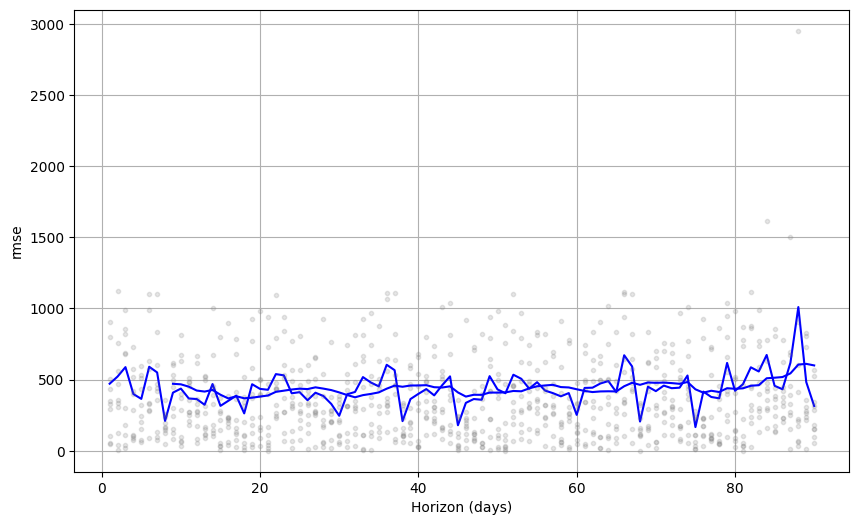

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plot_cross_validation_metric(df_cv,
                             metric='rmse',
                             rolling_window=.01,
                             ax=ax)
plot_cross_validation_metric(df_cv,
                             metric='rmse',
                             rolling_window=.1,
                             ax=ax)
plt.show()

## 불규칙한 컷오프 처리(Handling irregular cut-offs)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/gvsnorat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/gw22z5xa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40541', 'data', 'file=/tmp/tmp2g1kuk5p/gvsnorat.json', 'init=/tmp/tmp2g1kuk5p/gw22z5xa.json', 'output', 'file=/tmp/tmp2g1kuk5p/prophet_modeld9ghp4cc/prophet_model-20250224135300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


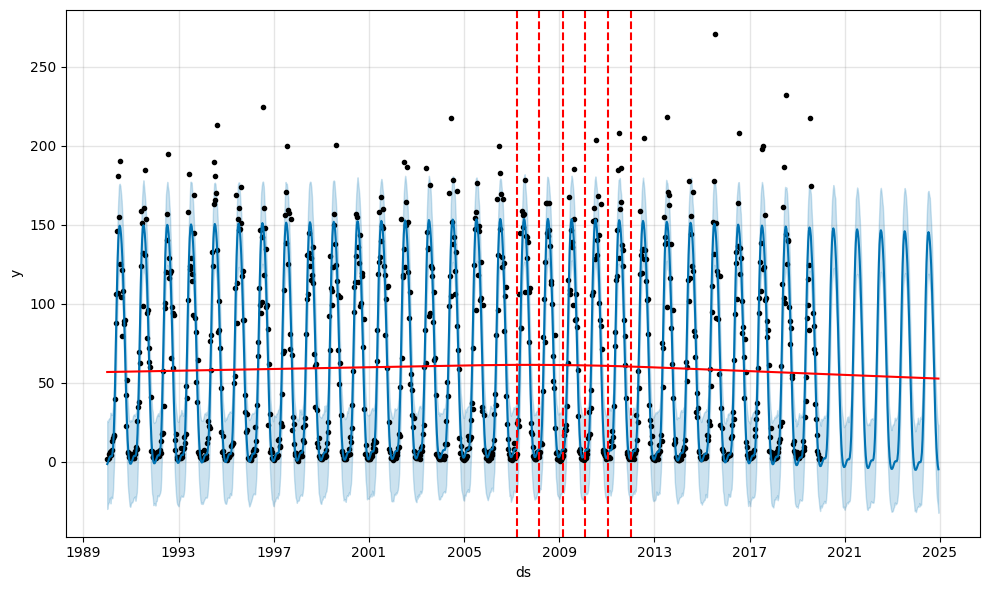

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/rainfall.csv')
df.columns = ['ds', 'y']

model = Prophet(yearly_seasonality=4)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
future = future[future['ds'].dt.day.isin([1, 11, 21])]
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

INFO:prophet:Making 302 forecasts with cutoffs between 1995-01-01 00:00:00 and 2019-09-22 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78f451f15f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/yu9p2a41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/al0_8c1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/iwrv7jou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/lwbk4bda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86896', 'data', 'file=/tmp/tmp2g1kuk5p/al0_8c1a.json', 'init=/tmp/tmp2g1kuk5p/lwbk4bda.json', 'output', 'file=/tmp/tmp2g1kuk5p/prophet_modelafw_7mqi/prophet_model-20250224135306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:06 - cmdstanpy - INFO

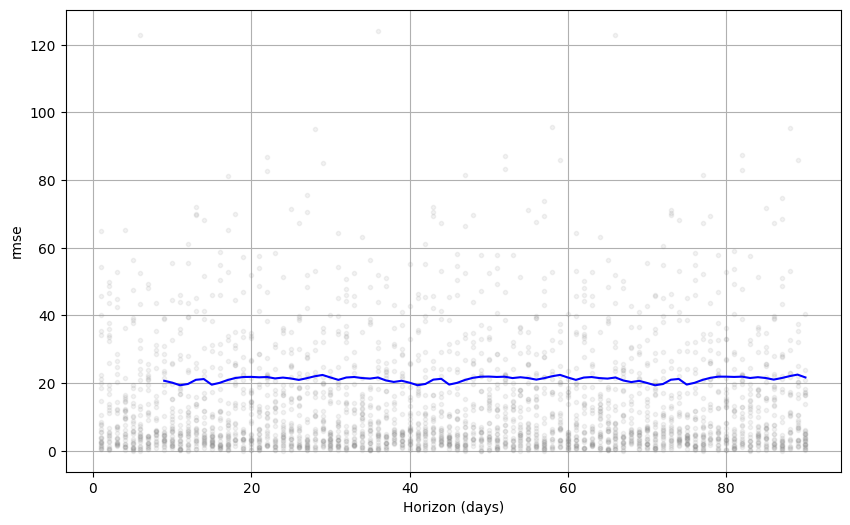

In [ ]:
# 런타임 2분
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='1826 days',
                         parallel='processes')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [ ]:
cutoffs = [pd.Timestamp('{}-{}-{}'.format(year, month, day))
           for year in range(2005, 2019)
           for month in range(1, 13)
           for day in [1, 11, 21]]

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78f44de0c0d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/5q0emt8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/h50zr0y2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/bgmr6446.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19600', 'data', 'file=/tmp/tmp2g1kuk5p/5q0emt8l.json', 'init=/tmp/tmp2g1kuk5p/bgmr6446.json', 'output', 'file=/tmp/tmp2g1kuk5p/prophet_modeldqwurqsz/prophet_model-20250224135419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/vhsbjde4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan arg

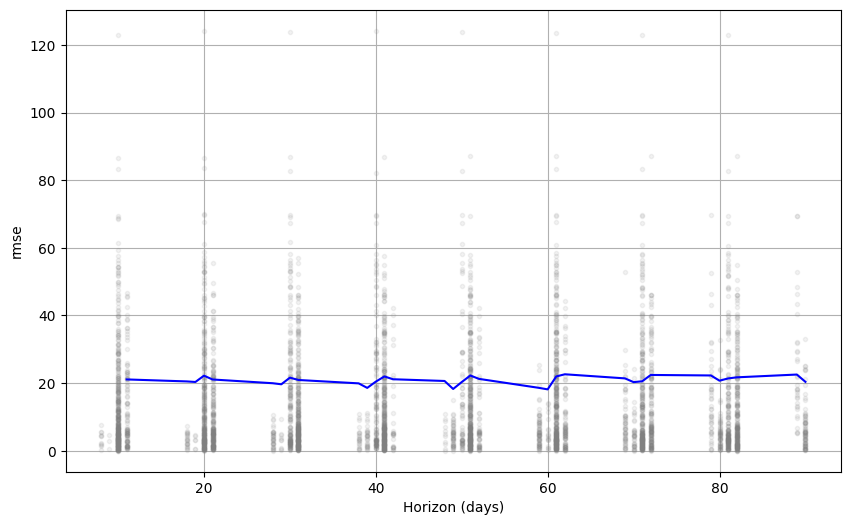

In [ ]:
# 런타임 2분
df_cv = cross_validation(model,
                         horizon='90 days',
                         parallel='processes',
                         cutoffs=cutoffs)
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

## 그리드 서치로 하이퍼파라미터 튜닝(Tuning hyperparameters with grid search)

In [ ]:
param_grid = {'changepoint_prior_scale': [0.5, 0.1, 0.01, 0.001],
              'seasonality_prior_scale': [10.0, 1.0, 0.1, 0.01],
              'seasonality_mode': ['additive', 'multiplicative']}

In [ ]:
import numpy as np
import itertools

all_params = [dict(zip(param_grid.keys(), value))
              for value in itertools.product(*param_grid.values())]
rmse_values= []

In [ ]:
cutoffs = [pd.Timestamp('{}-{}-{}'.format(year, month, day))
           for year in range(2010, 2019)
           for month in range(1, 13)
           for day in [1, 11, 21]]

In [ ]:
##### 주의! 런타임 1시간 30분
for params in all_params:
    model = Prophet(yearly_seasonality=4, **params).fit(df)
    df_cv = cross_validation(model,
                             cutoffs=cutoffs,
                             horizon='30 days',
                             parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmse_values.append(df_p['rmse'].values[0])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53423', 'data', 'file=/tmp/tmp2g1kuk5p/um3td5um.json', 'init=/tmp/tmp2g1kuk5p/s_rd8s4m.json', 'output', 'file=/tmp/tmp2g1kuk5p/prophet_modelk2d854jt/prophet_model-20250224151453.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
15:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:14:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/shwm406z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2g1kuk5p/egck5tqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_

In [ ]:
results = pd.DataFrame(all_params)
results['rmse'] = rmse_values
results.head()

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,rmse
0,0.5,10.0,additive,22.620084
1,0.5,10.0,multiplicative,23.048049
2,0.5,1.0,additive,22.619561
3,0.5,1.0,multiplicative,23.054899
4,0.5,0.1,additive,22.631168


In [ ]:
best_params = all_params[np.argmin(rmse_values)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive'}
